In [ ]:
# 📊 Анализ продаж e-commerce (2023–2024)
В этом ноутбуке выполняется анализ данных интернет-магазина:
- Выручка по месяцам
- ТОП-10 товаров
- Анализ клиентов
- Визуализации


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Настройки отображения графиков
plt.style.use('ggplot')  # заменили seaborn стиль
sns.set(font_scale=1.2)

# Загружаем данные
df = pd.read_csv('../data/ecommerce_sales_data.csv')

# Проверим первые строки
df.head()


,order_id,customer_id,product_name,price,quantity,date,city
0,1,2006,Keyboard,49,5,2023-04-05,Екатеринбург
1,2,2273,Laptop,1082,2,2024-10-26,Москва
2,3,1309,Headphones,167,3,2024-09-06,Москва
3,4,476,Phone,861,2,2023-11-19,Санкт-Петербург
4,5,14,Keyboard,96,1,2024-03-21,Санкт-Петербург


In [5]:
df = pd.read_csv('../data/ecommerce_sales_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)


In [5]:
# Информация о данных
df.info()

# Основные статистики
df.describe()

# Проверим пропуски
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      10000 non-null  int64 
 1   customer_id   10000 non-null  int64 
 2   product_name  10000 non-null  object
 3   price         10000 non-null  int64 
 4   quantity      10000 non-null  int64 
 5   date          10000 non-null  object
 6   city          10000 non-null  object
dtypes: int64(4), object(3)
memory usage: 547.0+ KB


order_id        0
customer_id     0
product_name    0
price           0
quantity        0
date            0
city            0
dtype: int64

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')


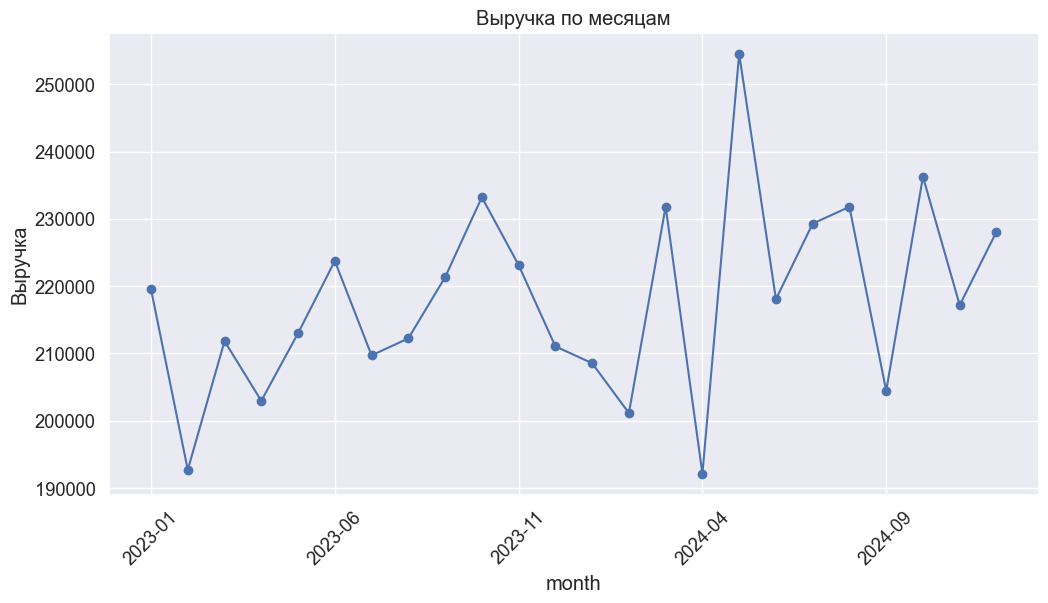

In [16]:
revenue_by_month = df.groupby('month')['price'].sum()

plt.figure(figsize=(12,6))
revenue_by_month.plot(kind='line', marker='o')
plt.title('Выручка по месяцам')
plt.ylabel('Выручка')
plt.xticks(rotation=45)
plt.savefig('../images/top_products.png')
plt.show()


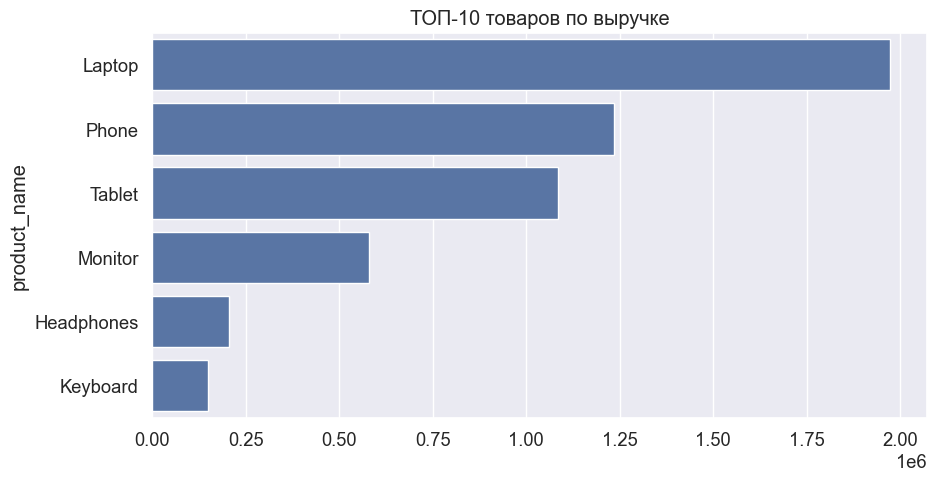

In [15]:
top_products = df.groupby('product_name')['price'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('ТОП-10 товаров по выручке')
plt.savefig('../images/top_products.png')
plt.show()


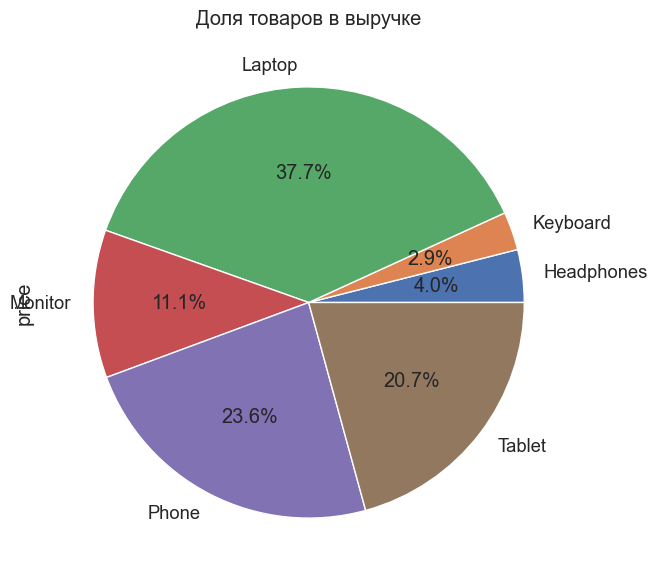

In [14]:
category_share = df.groupby('product_name')['price'].sum()
category_share.plot(kind='pie', autopct='%1.1f%%', figsize=(7,7))
plt.title('Доля товаров в выручке')
plt.savefig('../images/top_products.png')
plt.show()


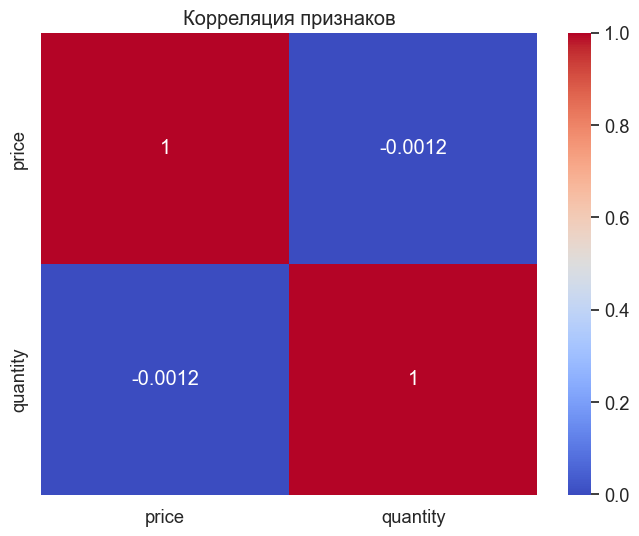

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['price','quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция признаков')
plt.savefig('../images/top_products.png')
plt.show()


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем данные
df = pd.read_csv('../data/ecommerce_sales_data.csv')

# Приводим дату к формату datetime
df['date'] = pd.to_datetime(df['date'])

# Добавляем столбец "month" для группировки
df['month'] = df['date'].dt.to_period('M').astype(str)


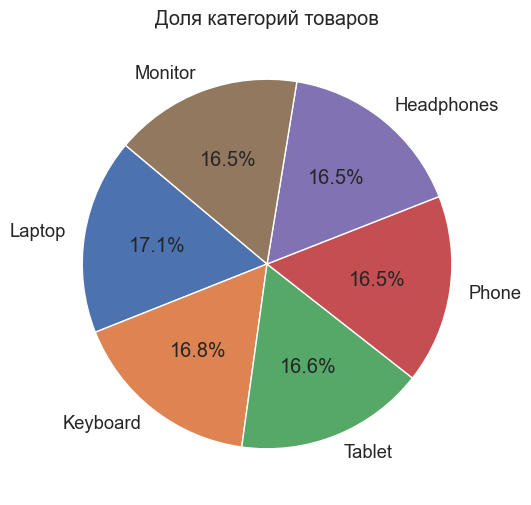

In [17]:
# Считаем долю категорий (товаров)
category_share = df['product_name'].value_counts()

# Строим круговую диаграмму
plt.figure(figsize=(8, 6))
category_share.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Доля категорий товаров')
plt.ylabel('')
plt.savefig('../images/category_share.png')  # Сохраняем в папку images
plt.show()
